# Chapter2. Practice List
1. Preprocessing - Data split, scaling

2. Machine Learning models - supervised, classification
  - logistic regression
  - knn
  - svm
  - decision tree
  - random forest
  - xgboost    
2-1. datasets including categorical variables   

3. Machine Learning models - supervised, regression  
  - regression version (decision tree regressor, svm regressor)

3. pycaret - package



In [1]:
# import modules
import pandas as pd

## Scikit-learn library
파이썬에서 머신러닝을 쉽게 쓸 수 있도록 도와주는 라이브러리  

[주요모듈]  
- sklearn.datasets : 예시데이터  
- sklearn.preprocessing: 데이터 전처리 가공  
- sklearn.decomposition: 차원축소 관련 알고리즘 제공  
- sklearn.model_setlection: 데이터 분리, 검증, 파라미터 튜닝  
- sklearn.metrics: classification, regression, clustering 등 성능 측정방법 제공  
- sklearn.ensemble, sklearn.linear_model, sklearn.naive_bayes, sklearn.neighbors, sklearn.svm, sklearn.tree, sklearn.cluster: 머신러닝 알고리즘  

# 1. Preprocessing
> Datasplit
- dataset should be separated before preprocessing(scaling)  
- use scikit-learn library

> Preprocessing
- normalization

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split # datasplit

iris = load_iris()
iris_data = iris.data
iris_label = iris.target
df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
df['label'] = iris.target
# data display
display(df.head(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
# data split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=test_size, random_state=7)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [5]:
# data scaling
'''
 (열) variable별로
 MinMaxScaler: 0~1 로 조정
 StandardScaler: 평균0, 분산1
 MaxAbsScaler: 절대값이 0~1 사이
 RobustScaler: StandardScaler에서 중간값(median)을 빼고 0, 사분위값(Q3-Q1)으로 나눔-극단값에 영향 덜받음
'''
from sklearn.preprocessing import MinMaxScaler#, StandardScaler, MaxAbsScaler, RobustScaler

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # train에서 구한 스케일링 파라미터로
X_test = scaler.transform(X_test) # test를 변환해야함 (fit_transform아님 유의)

# 2. Machine Learning Models - supervised, classification
- logistic regression
- knn
- svm
- decision tree
- random forest in ensemble method (bagging)
- xgboost in ensemble method (boosting)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # performance measure

### 모델 구축 - 훈련 - 평가 Flow

1. 모델구성
 hyperparameter 조절  
2. 모델 훈련  
 모델.fit(X_train, y_train)    
3. 모델 평가  
 y_pred = 모델.predict(X_test)  
4. 성능 계산  
 accuracy_score(y_test, y_pred)  

(모델 1) Logistic Regression

In [8]:
# 1. 모델 구성
lr_clf = LogisticRegression(random_state=0)

In [9]:
# 2. 모델 훈련
lr_clf.fit(X_train, y_train) # training

LogisticRegression(random_state=0)

In [10]:
lr_clf.coef_

array([[-1.29602544,  1.50281168, -2.56592375, -2.49614881],
       [ 0.11733459, -1.77428112,  0.43785747, -0.43580031],
       [ 1.17869085,  0.27146943,  2.12806628,  2.93194911]])

In [11]:
# 3. 모델 평가
y_pred = lr_clf.predict(X_test) # predict (for test_data)
y_pred

array([2, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [12]:
# 4. 성능 계산
test_acc = accuracy_score(y_test, y_pred) # evaluate test_data
print('logistic regression test accuracy : {0: .4f}'.format(test_acc))

logistic regression test accuracy :  0.7667


In [13]:
# Embedding other machine learning modules
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn import svm # svm
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.ensemble import RandomForestClassifier

try:
    from xgboost import XGBClassifier
except ImportError:
    %pip install xgboost
    from xgboost import XGBClassifier

In [14]:
# 1. 모델 구성
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
svm_clf = svm.SVC() # classification
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()

hyperparameter 확인방법:
- help(~~)
- shift+tab (vscode, jupyterlab, jupyter notebook)

In [15]:
# 2. 모델 구축
knn_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
# 3. 모델 평가
y_pred1 = knn_clf.predict(X_test)
y_pred2 = dt_clf.predict(X_test)
y_pred3 = svm_clf.predict(X_test)
y_pred4 = rf_clf.predict(X_test)
y_pred5 = xgb_clf.predict(X_test)

In [17]:
def cal_test_acc_score(y_pred):
  return accuracy_score(y_test, y_pred)

In [18]:
# 4. 성능 계산
y_pred_df = pd.DataFrame(y_pred1, columns = ['knn'])
y_pred_df['dt'] = y_pred2
y_pred_df['svm'] = y_pred3
y_pred_df['rf'] = y_pred4
y_pred_df['xgb'] = y_pred5


In [19]:
y_pred_df.apply(lambda x: cal_test_acc_score(x))

knn    0.933333
dt     0.900000
svm    0.866667
rf     0.866667
xgb    0.866667
dtype: float64

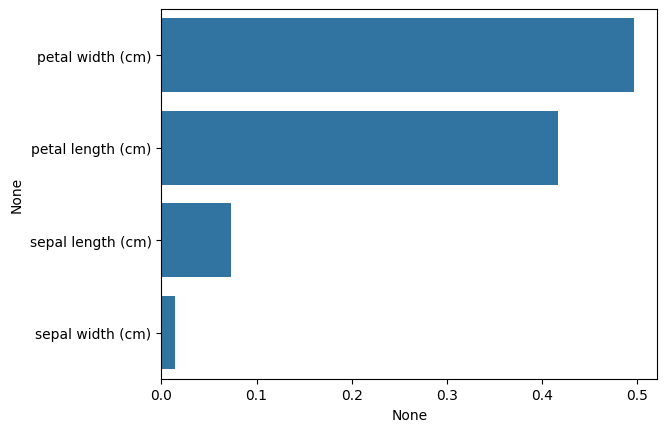

In [21]:
# feature importance using random forest
import matplotlib.pyplot as plt
import seaborn as sns

rf_clf.feature_importances_

feature_importance = pd.Series(rf_clf.feature_importances_, index = iris.feature_names)
feature_importance = feature_importance.sort_values(ascending=False)


sns.barplot(x = feature_importance, y = feature_importance.index)
plt.show()


In [22]:
# parameter 조정
# help(knn_clf)
# dir(knn_clf)
# knn_clf.n_neighbors
rf_clf.n_estimators

100

In [23]:
rf_list = [25, 50, 100, 150, 200]#[3,4,5,6,7,8]
acc_list = []
for k in rf_list:
    rf = RandomForestClassifier(n_estimators=k)
    knnclf = rf.fit(X_train, y_train)
    scores = accuracy_score(y_test, knnclf.predict(X_test))
    acc_list.append(scores)
acc_list

# # k의 변화에 따른 정확도 시각화
# import matplotlib.pyplot as plt
# plt.plot(rf_list, acc_list)
# plt.xlabel('the number of k')
# plt.ylabel('Accuracy')
# plt.show()

[0.9,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667]

## 2-1. Handling Datasets including categorical variables

- pd.get_dummies 활용

categorical variable 생성
- variable별로 Q1, Q2, Q3, Q4를 배정한 후 학습에 활용

In [24]:
def define_quantile(datalist, column_name):
  quantile = datalist[column_name].quantile([0.25, 0.5, 0.75])
  def label_quantile(value):
    if value <= quantile[0.25]:
        return 'Q1'
    elif value <= quantile[0.5]:
        return 'Q2'
    elif value <= quantile[0.75]:
        return 'Q3'
    else:
        return 'Q4'
  datalist[f'{column_name}_Q'] = df[column_name].apply(label_quantile)

In [25]:
df_iris = df.copy()
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [26]:
define_quantile(df_iris, 'sepal length (cm)')
define_quantile(df_iris, 'sepal width (cm)')
define_quantile(df_iris, 'petal length (cm)')
define_quantile(df_iris, 'petal width (cm)')

In [27]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal length (cm)_Q,sepal width (cm)_Q,petal length (cm)_Q,petal width (cm)_Q
0,5.1,3.5,1.4,0.2,0,Q1,Q4,Q1,Q1
1,4.9,3.0,1.4,0.2,0,Q1,Q2,Q1,Q1
2,4.7,3.2,1.3,0.2,0,Q1,Q3,Q1,Q1
3,4.6,3.1,1.5,0.2,0,Q1,Q3,Q1,Q1
4,5.0,3.6,1.4,0.2,0,Q1,Q4,Q1,Q1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Q4,Q2,Q4,Q4
146,6.3,2.5,5.0,1.9,2,Q3,Q1,Q3,Q4
147,6.5,3.0,5.2,2.0,2,Q4,Q2,Q4,Q4
148,6.2,3.4,5.4,2.3,2,Q3,Q4,Q4,Q4


In [28]:
df_iris.columns
df_cate_column = [x for x in df_iris.columns if x.endswith('_Q')]
df_cate_column

['sepal length (cm)_Q',
 'sepal width (cm)_Q',
 'petal length (cm)_Q',
 'petal width (cm)_Q']

In [29]:
df_iris_ohe = pd.get_dummies(df_iris, columns = df_cate_column, dtype=int)
df_iris_ohe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal length (cm)_Q_Q1,sepal length (cm)_Q_Q2,sepal length (cm)_Q_Q3,sepal length (cm)_Q_Q4,sepal width (cm)_Q_Q1,...,sepal width (cm)_Q_Q3,sepal width (cm)_Q_Q4,petal length (cm)_Q_Q1,petal length (cm)_Q_Q2,petal length (cm)_Q_Q3,petal length (cm)_Q_Q4,petal width (cm)_Q_Q1,petal width (cm)_Q_Q2,petal width (cm)_Q_Q3,petal width (cm)_Q_Q4
0,5.1,3.5,1.4,0.2,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


# 3. Machine Learning models - supervised, regression

- knn
- svm
- decision tree
- random forest
- xgboost

In [30]:
# data load - diabetes open dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes_data = diabetes.data
diabetes_y = diabetes.target
df = pd.DataFrame(data = diabetes_data, columns = diabetes.feature_names)
df['target'] = diabetes.target
# data display
display(df.head(3))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [31]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_y, test_size=test_size)


In [32]:
# Embedding other machine learning modules
from sklearn.neighbors import KNeighborsRegressor # knn
from sklearn.tree import DecisionTreeRegressor # decision tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [33]:
# 1. 모델 구성
knn_regr = KNeighborsRegressor()
dt_regr = DecisionTreeRegressor()
svm_regr = svm.SVR() # classification
rf_regr = RandomForestRegressor()
xgb_regr = XGBRegressor()

In [34]:
# 2. 모델 구축
knn_regr.fit(X_train, y_train)
dt_regr.fit(X_train, y_train)
svm_regr.fit(X_train, y_train)
rf_regr.fit(X_train, y_train)
xgb_regr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
# 3. 모델 평가
y_pred1 = knn_regr.predict(X_test)
y_pred2 = dt_regr.predict(X_test)
y_pred3 = svm_regr.predict(X_test)
y_pred4 = rf_regr.predict(X_test)
y_pred5 = xgb_regr.predict(X_test)

In [36]:
# 4. 성능 계산
y_pred_df = pd.DataFrame(y_pred1, columns = ['knn'])
y_pred_df['dt'] = y_pred2
y_pred_df['svm'] = y_pred3
y_pred_df['rf'] = y_pred4
y_pred_df['xgb'] = y_pred5

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
def cal_rmse(y_pred):
  return mean_squared_error(y_test,y_pred)

In [38]:
y_pred_df.apply(lambda x: cal_rmse(x))

knn    3537.155955
dt     6784.797753
svm    4942.667570
rf     3711.705527
xgb    4700.492192
dtype: float64

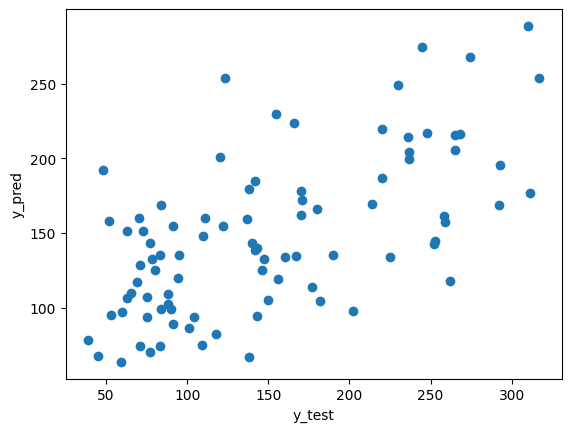

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test, y_pred_df['knn'], 'o')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#5. Pycaret library
- Pycaret이란, Python 기반의 오픈 소스 머신러닝라이브러리
- 머신 러닝 모델을 쉽게 구축하고 비교하며, 모델을 최적화하고 평가하는데 도움을 줌.
- 이를 활용해서, 데이터 과학자는 최소한의 코드 작성으로 다양한 머신러닝 모델을 탐색하고 최적화 가능.
- Pycaret을 활용해서 머신러닝을 통해 구현되는 a) 분류, b) 회귀, c) 클러스터링, d) 이상치 탐지 등 다양한 문제에 대한 모델을 쉽게 빠르게 구축할 수 있음   
출처: https://jaylala.tistory.com/entry/머신러닝-with-파이썬-Pycaret이란-Pycaret을-활용한-머신러닝
https://pycaret.gitbook.io/docs

!pip install pycaret

venv 를 활용한 가상환경 구축 권장
(Conda 사용시 환경 충돌 발생)


python3.11 -m venv .venv

source .venv/bin/activate

pip install pycaret xgboost seaborn

In [40]:
!pip install pycaret


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [41]:
from pycaret.datasets import get_data
from pycaret.classification import *

In [42]:
# Iris 내장 데이터 로드
data=get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
from sklearn.model_selection import train_test_split # datasplit

In [44]:
# 데이터 나눔
from sklearn.model_selection import train_test_split # datasplit
test_size = 0.2
data_train, data_test = train_test_split(data, test_size=test_size)

In [45]:
# setup 함수는 Pycaret에서 사용되는 데이터 전처리 및 모델 학습 설정을 수행합니다.
# 데이터 전처리와 모델 학습 설정
exp = setup(data_train, target='species')

,Description,Value
0,Session id,2488
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(120, 5)"
5,Transformed data shape,"(120, 5)"
6,Transformed train set shape,"(84, 5)"
7,Transformed test set shape,"(36, 5)"
8,Numeric features,4
9,Preprocess,True


Setup 함수설명

- session_id: 각 실험에 대한 고유한 세션 ID, 이 값은 실험을 추적하고 관리하는데 사용되는 값으로, 임의로 생성

- Target : 목표 변수(타겟)

- Target Type: 목표 변수 (타겟)의 데이터 타입, 자동으로 감지

- Target Mapping : 목표 변수의 종류를 알려줍니다.
  목표 변수는 setosa, versicolor, virginica 이며, 각 변수들은 분석간 0 / 1 / 2 로 벡터화됨을 의미합니다.

- Original Data Shape: 원본 데이터의 형태, 즉 행과 열의 수를 나타내는 정보

- Transformed Data Shape : 데이터 전처리 후 결과

- Transformed train set shape : 전처리 된 데이터를 학습 데이터로 나눈 결과

- Transformed test set shape : 전처리 된 데이터를 테스트 데이터로 나눈 결과

- Numeric Features  : 데이터셋에서 숫자로 표현된 독립변수 개수

- Preprocess : setup 함수에서 진행한 전처리(Preprocess)여부. 전처리는 1) 결측값 처리, 2) 범주형 변수 인코딩, 3) 데이터 분할(학습 / 테스트), 4) 스케일링(표준화 또는 정규화)

- Imputation type : 결측값을 어떻게 처리할 지

- Numeric Imputation : 숫자형 데이터의 결측값 처리방법

- Categorical Imputation : 범주형 데이터의 결측값 처리 방법

- Fold Generator : k-fold CV를 위해 fold를 만들때 fold를 나누는 방법

- Fold Number : fold의 개수

- cpu_jobs : 병렬 처리에 사용되는 CPU 코어의 개수
 -1: 시스템에서 사용할 수 있는 모든 CPU를 사용

- Use GPU : GPU를 사용했는지 여부

- Log Experiment : 실험 결과를 로그에 기록하고 관리할지

- Experiment Name : 실험 이름

출처: https://jaylala.tistory.com/entry/머신러닝-with-파이썬-Pycaret이란-Pycaret을-활용한-머신러닝

In [46]:
# 모델 비교
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9639,0.0000,0.9639,0.9729,0.9612,0.9443,0.9501,0.0050
lda,Linear Discriminant Analysis,0.9528,0.0000,0.9528,0.9646,0.9498,0.9276,0.9350,0.0040
nb,Naive Bayes,0.9514,0.9954,0.9514,0.9635,0.9475,0.9248,0.9327,0.0930
lr,Logistic Regression,0.9403,0.0000,0.9403,0.9562,0.9373,0.9090,0.9184,0.3240
et,Extra Trees Classifier,0.9403,0.9904,0.9403,0.9562,0.9373,0.9090,0.9184,0.0130
lightgbm,Light Gradient Boosting Machine,0.9403,0.9855,0.9403,0.9562,0.9373,0.9090,0.9184,0.1260
rf,Random Forest Classifier,0.9292,1.0000,0.9292,0.9479,0.9258,0.8924,0.9033,0.0170
ada,Ada Boost Classifier,0.9292,0.0000,0.9292,0.9479,0.9258,0.8924,0.9033,0.0080
gbc,Gradient Boosting Classifier,0.9292,0.0000,0.9292,0.9479,0.9258,0.8924,0.9033,0.0150
knn,K Neighbors Classifier,0.9278,0.9917,0.9278,0.9396,0.9248,0.8895,0.8970,0.1020


In [47]:
# 가장 결과가 좋았던 QDA를 바탕으로 10 fold CV를 수행한 결과
# 모델 학습과 하이퍼파라미터 튜닝을 자동으로 수행
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.0000,0.8889,0.9167,0.8857,0.8333,0.8492
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8750,0.0000,0.8750,0.9062,0.8631,0.8049,0.8260
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [48]:
# 모델 평가
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:
# 예측을 위한 test data
test_data = data_test


In [50]:
# 예측 수행
pred = predict_model(tuned_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9667,0.9965,0.9667,0.9694,0.9666,0.9495,0.9511


In [51]:
# 단일 모델만 선택해서 학습
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [52]:
select_model = create_model('rf')
tuned_model = tune_model(select_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
3,0.8889,1.0000,0.8889,0.9167,0.8857,0.8333,0.8492
4,0.8750,1.0000,0.8750,0.9062,0.8631,0.8049,0.8260
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8750,1.0000,0.8750,0.9062,0.8631,0.8049,0.8260
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9444,0.8889,0.9167,0.8857,0.8333,0.8492
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.8889,0.8889,0.9167,0.8857,0.8333,0.8492
3,1.0000,0.9444,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.9000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.9500,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8750,0.9771,0.8750,0.9062,0.8631,0.8049,0.8260
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [54]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…